In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(city_df,ride_df, on='city')
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [64]:
#create agg function
agg_func = {'fare':'mean', 'ride_id':'nunique','driver_count':'sum'}
agg_fare = {'fare': 'sum', 'ride_id': 'count', 'driver_count': 'sum'}

In [30]:
city_info = combined_df.type.unique()

In [31]:
#create grouped by city type
urban = combined_df[combined_df.type == 'Urban'].groupby(['city','type']).agg(agg_func)

In [15]:
suburban =combined_df[combined_df.type == 'Suburban'].groupby(['city','type']).agg(agg_func)

In [16]:
rural = combined_df[combined_df.type == 'Rural'].groupby(['city','type']).agg(agg_func)

## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [19]:
urban_riders =urban['ride_id']
urban_riders.head()

city             type 
Amandaburgh      Urban    18
Barajasview      Urban    22
Carriemouth      Urban    27
Christopherfurt  Urban    27
Deanville        Urban    19
Name: ride_id, dtype: int64

In [20]:
urban_fares =urban['fare']
urban_fares.head()

city             type 
Amandaburgh      Urban    24.641667
Barajasview      Urban    25.332273
Carriemouth      Urban    28.314444
Christopherfurt  Urban    24.501852
Deanville        Urban    25.842632
Name: fare, dtype: float64

In [21]:
urban_drivers =urban['driver_count']
urban_drivers.head()

city             type 
Amandaburgh      Urban     216
Barajasview      Urban     572
Carriemouth      Urban    1404
Christopherfurt  Urban    1107
Deanville        Urban     931
Name: driver_count, dtype: int64

In [22]:
suburban_riders =suburban['ride_id']
suburban_riders.head()

city           type    
Barronchester  Suburban    16
Bethanyland    Suburban    18
Brandonfort    Suburban    19
Colemanland    Suburban    22
Davidfurt      Suburban    17
Name: ride_id, dtype: int64

In [23]:
suburban_fares =suburban['fare']
suburban_fares.head()

city           type    
Barronchester  Suburban    36.422500
Bethanyland    Suburban    32.956111
Brandonfort    Suburban    35.437368
Colemanland    Suburban    30.894545
Davidfurt      Suburban    31.995882
Name: fare, dtype: float64

In [24]:
suburban_drivers =suburban['driver_count']
suburban_drivers.head()

city           type    
Barronchester  Suburban    176
Bethanyland    Suburban    396
Brandonfort    Suburban    190
Colemanland    Suburban    506
Davidfurt      Suburban    391
Name: driver_count, dtype: int64

In [25]:
rural_riders =rural['ride_id']
rural_riders.head()

city            type 
Bradshawfurt    Rural    10
Garzaport       Rural     3
Harringtonfort  Rural     6
Jessicaport     Rural     6
Lake Jamie      Rural     6
Name: ride_id, dtype: int64

In [27]:
rural_fares =rural['fare']
rural_fares.head()

city            type 
Bradshawfurt    Rural    40.064000
Garzaport       Rural    24.123333
Harringtonfort  Rural    33.470000
Jessicaport     Rural    36.013333
Lake Jamie      Rural    34.358333
Name: fare, dtype: float64

In [28]:
rural_drivers =rural['driver_count']
rural_drivers.head()

city            type 
Bradshawfurt    Rural    70
Garzaport       Rural    21
Harringtonfort  Rural    24
Jessicaport     Rural     6
Lake Jamie      Rural    24
Name: driver_count, dtype: int64

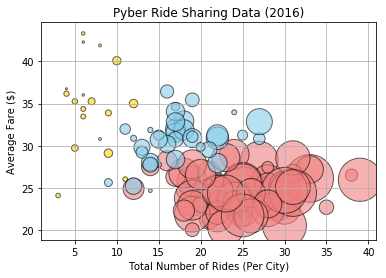

In [36]:
urban_scatter = plt.scatter(urban_riders,urban_fares, s=urban_drivers, c='lightcoral', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_info[0])
suburban_scatter = plt.scatter(suburban_riders,suburban_fares, s=suburban_drivers, c='skyblue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_info[0])
rural_scatter = plt.scatter(rural_riders,rural_fares, s=rural_drivers, c='gold', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_info[0])
plt.xlabel('Total Number of Rides (Per City)', fontdict=None, labelpad=None)
plt.ylabel('Average Fare ($)', fontdict=None, labelpad=None)
plt.title('Pyber Ride Sharing Data (2016)', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

## Total Fares by City Type

In [65]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
city_fares = combined_df.groupby(['type']).agg(agg_fare)
city_fares

,fare,ride_id,driver_count
type,,,
Rural,4327.93,125,537
Suburban,19356.33,625,8570
Urban,39854.38,1625,59602


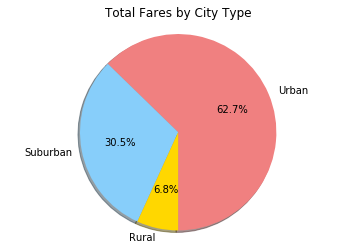

In [78]:
# Show Figure
city_types = ["Urban", "Suburban", "Rural"]
fares = ["39854", "19356","4327"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,0]
plt.pie(fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Total Fares by City Type', fontdict=None, loc='center', pad=None)
plt.axis('equal')
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


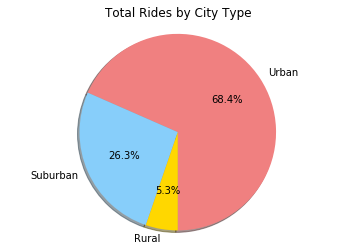

In [77]:
# Show Figure
city_types = ["Urban", "Suburban", "Rural"]
rides = ["1625", "625","125"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,0]
plt.pie(rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Total Rides by City Type', fontdict=None, loc='center', pad=None)
plt.axis('equal')
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


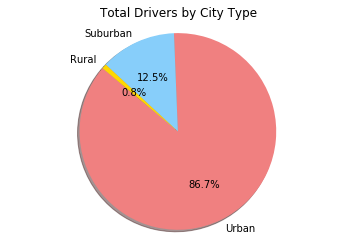

In [76]:
# Show Figure
city_types = ["Urban", "Suburban", "Rural"]
drivers = ["59602", "8570","537"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,0]
plt.pie(drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Total Drivers by City Type', fontdict=None, loc='center', pad=None)
plt.axis('equal')
plt.show()